In [11]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
!pip install nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/DELL/Downloads/assignment/text mining/Elon_musk.csv", encoding= "ISO-8859-1")
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
data.shape

(1999, 1)

In [6]:
data.rename({'Text':'text'}, axis=1, inplace=True)

In [7]:
df = [text.strip() for text in data.text]  #remove both the leading and trailing spaces
df = [text for text in data.text] # removes empty strings, because they are considered as false in python
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [8]:
#joining the list into one string/text

df_text = ' '.join(df)
len(df_text)

158805

In [12]:
print(df_text[0:500])

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! 


In [15]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_tokens = word_tokenize(df_text)

print(df_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['@', 'kunalb11', 'I\x92m', 'an', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'is', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https', ':', '//t.co/zGxJFDzzrM', '@', 'OwenSparks_', '@', 'flcnhvy', '@', 'anonyx10', 'Haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@', 'Gi

In [16]:
len(df_tokens)

28892

In [19]:
#Stopwords
import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords

my_stopwords = stopwords.words('english')
my_stopwords.append('the')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
no_stoptoken = [text for text in df_tokens if not text in my_stopwords]

print(no_stoptoken[0:400])

['@', 'kunalb11', 'I\x92m', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', 'Happy', 'New', 'Year', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo', 'underdoge', ',', 'All', 'thought', 'would', 'fail', ',', 'Himself', '.', 'https', ':', '//t.co/zGxJFDzzrM', '@', 'OwenSparks_', '@', 'flcnhvy', '@', 'anonyx10', 'Haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'Indeed', '!', 'Tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'entertaining', 'outcome', 'likely', '@', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', '@', 'kanyewest', 'https', ':', '//t.co/3rWE9uHSTS', '@', 'geoffkeighley', '@', 'UnrealEngine', 'It\x92s', 'getting', 'real

In [21]:
# Normalize data

lower_words = [text.lower() for text in no_stoptoken]
print(lower_words[0:400])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tried', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestimated', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happy', 'new', 'year', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2oj', 'frodo', 'underdoge', ',', 'all', 'thought', 'would', 'fail', ',', 'himself', '.', 'https', ':', '//t.co/zgxjfdzzrm', '@', 'owensparks_', '@', 'flcnhvy', '@', 'anonyx10', 'haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'indeed', '!', 'tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '.', 'the', 'entertaining', 'outcome', 'likely', '@', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', '@', 'kanyewest', 'https', ':', '//t.co/3rwe9uhsts', '@', 'geoffkeighley', '@', 'unrealengine', 'it\x92s', 'getting', 'real

In [23]:
!python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")

     ---------------------------------------- 12.8/12.8 MB 9.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [24]:
doc = nlp(' '.join(lower_words))
print(doc[0:400])

@ kunalb11 im alien @ id_aa_carmack ray tracing cyberpunk hdr next-level . have tried ? @ joerogan @ spotify great interview ! @ gtera27 doge underestimated @ teslacn congratulations tesla china amazing execution last year . now next even ! ! happy new year ox ! https : //t.co/9wfkmyu2oj frodo underdoge , all thought would fail , himself . https : //t.co/zgxjfdzzrm @ owensparks_ @ flcnhvy @ anonyx10 haha thanks : ) @ flcnhvy @ anonyx10 indeed ! tweets definitely represent real-world time allocation . the entertaining outcome likely @ givedirectly just sent just agree clubhouse @ kanyewest https : //t.co/3rwe9uhsts @ geoffkeighley @ unrealengine its getting real bought dogecoin lil x , toddler hodler @ joshmanmode he definitely issues , sentencing seems bit high @ freewalletorg thanks fixing @ freewalletorg please unlock account @ astrojordy < u+0001f923 > < u+0001f923 > this true power haha https : //t.co/fc9uhqsd7o @ freewalletorg any crypto wallet wont give private keys avoided co

In [26]:
lemma = [token.lemma_ for token in doc]
print(lemma[0:400])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'next', '-', 'level', '.', 'have', 'try', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestimate', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happy', 'new', 'year', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2oj', 'frodo', 'underdoge', ',', 'all', 'thought', 'would', 'fail', ',', 'himself', '.', 'https', ':', '//t.co', '/', 'zgxjfdzzrm', '@', 'owenspark', '_', '@', 'flcnhvy', '@', 'anonyx10', 'haha', 'thank', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'indeed', '!', 'tweet', 'definitely', 'represent', 'real', '-', 'world', 'time', 'allocation', '.', 'the', 'entertaining', 'outcome', 'likely', '@', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', '@', 'kanyew', 'https', ':', '//t.co/3rwe9uhsts', '@', 'geoffkeighley', '@', 'unrealengine', 'it\x92s',

# Feature Extraction

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

cv.fit_transform(lemma)

<25025x4877 sparse matrix of type '<class 'numpy.int64'>'
	with 17029 stored elements in Compressed Sparse Row format>

In [29]:
print(cv.get_feature_names_out()[10:300])



['0001f338' '0001f339' '0001f353' '0001f381' '0001f3a9' '0001f3af'
 '0001f3b6' '0001f3b7' '0001f3dd' '0001f409' '0001f40d' '0001f410'
 '0001f43b' '0001f440' '0001f446' '0001f447' '0001f44c' '0001f44d'
 '0001f476' '0001f47b' '0001f484' '0001f495' '0001f4a8' '0001f4a9'
 '0001f4ab' '0001f4af' '0001f4b0' '0001f4b5' '0001f525' '0001f534'
 '0001f54a' '0001f5a4' '0001f600' '0001f603' '0001f608' '0001f609'
 '0001f60e' '0001f60f' '0001f610' '0001f622' '0001f62c' '0001f62e'
 '0001f634' '0001f680' '0001f6f0' '0001f914' '0001f917' '0001f918'
 '0001f920' '0001f923' '0001f9d9' '0001f9db' '0001fa82' '041a' '041e'
 '0430' '0431' '0432' '0434' '0435' '0438' '043a' '043b' '043c' '043d'
 '043e' '043f' '0440' '0441' '044b' '044c' '0451' '05' '07puoramgo'
 '095whx44bx' '0ckvhrmtf1' '0ct2svangy' '0gutz4kgij' '0kaav0dtnn'
 '0rc72s0zay' '0s0ybscm0p' '0srlfg03fg' '0vas3cck9p' '0y5fkvqpk8' '10'
 '100' '1000' '107' '10x' '11' '11thhour' '12' '122' '13' '13arm13arm'
 '13ericralph31' '14' '15' '150' '155' '16' '16

In [31]:
print(cv.vocabulary_)

{'kunalb11': 2440, 'alien': 432, 'id_aa_carmack': 2133, 'ray': 3456, 'trace': 4348, 'cyberpunk': 1197, 'hdr': 2006, 'next': 2934, 'level': 2514, 'have': 1996, 'try': 4381, 'joerogan': 2338, 'spotify': 3961, 'great': 1923, 'interview': 2249, 'gtera27': 1941, 'doge': 1361, 'underestimate': 4449, 'teslacn': 4191, 'congratulations': 1089, 'tesla': 4183, 'china': 965, 'amazing': 458, 'execution': 1599, 'last': 2471, 'year': 4813, 'now': 2978, 'even': 1569, 'happy': 1982, 'new': 2931, 'ox': 3114, 'https': 2100, 'co': 1015, '9wfkmyu2oj': 310, 'frodo': 1784, 'underdoge': 4448, 'all': 435, 'thought': 4269, 'would': 4744, 'fail': 1640, 'himself': 2052, 'zgxjfdzzrm': 4854, 'owenspark': 3111, 'flcnhvy': 1723, 'anonyx10': 488, 'haha': 1965, 'thank': 4226, 'indeed': 2186, 'tweet': 4400, 'definitely': 1258, 'represent': 3538, 'real': 3471, 'world': 4738, 'time': 4285, 'allocation': 437, 'the': 4233, 'entertaining': 1517, 'outcome': 3090, 'likely': 2537, 'givedirectly': 1885, 'just': 2369, 'send': 373

# CountVectorizer using N-grams

In [33]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemma)
print(cv_ngram_range.get_feature_names_out())


print(bow_matrix_ngram.toarray())

['0001f923' 'actually' 'ajtourville' 'also' 'amp' 'car' 'cleantechnica'
 'co' 'come' 'could' 'crew' 'day' 'dragon' 'earth' 'engine'
 'engineers_feed' 'ercxspace' 'erdayastronaut' 'evafoxu' 'exactly'
 'falcon' 'felixschlang' 'first' 'flcnhvy' 'flight' 'get' 'go' 'good'
 'great' 'haha' 'hard' 'high' 'https' 'id_aa_carmack' 'it' 'kristennetten'
 'land' 'launch' 'lexfridman' 'like' 'long' 'lot' 'make' 'marcushousegame'
 'maybe' 'mission' 'model' 'much' 'nasa' 'nasaspaceflight' 'need' 'new'
 'next' 'no' 'one' 'people' 'ppathole' 'pretty' 'probably' 'production'
 'rationaletienne' 're' 'right' 'rt' 'soon' 'space' 'space_station'
 'spacex' 'starship' 'still' 'sure' 'take' 'tesla' 'teslaownerssv'
 'teslarati' 'tesmanian_com' 'test' 'thank' 'that' 'the' 'there'
 'thesheetztweetz' 'they' 'think' 'this' 'time' 'true' 'use' 'way' 'we'
 'we re' 'well' 'wholemarsblog' 'will' 'work' 'would' 'yeah' 'year' 'yes'
 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [

# TF-IDF Vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidfv_ngram_max_features = TfidfVectorizer(norm='l2', analyzer='word', ngram_range=(1,3), max_features=500)
tfidf_matrix_ngram = tfidfv_ngram_max_features.fit_transform(lemma)

feature_names = tfidfv_ngram_max_features.get_feature_names_out()

print(feature_names)


['000' '0001f495' '0001f525' '0001f5a4' '0001f923' '10' '100' '20' '2192'
 '28delayslater' '30' '60' 'absolutely' 'accurate' 'actually' 'adamklotz'
 'add' 'ago' 'agree' 'ai' 'aim' 'air' 'ajtourville' 'all' 'almost'
 'already' 'also' 'although' 'amazing' 'amp' 'and' 'another' 'appear'
 'apply' 'appreciate' 'archillect' 'around' 'article' 'as' 'astro_doug'
 'astrobehnken' 'astrojordy' 'astronaut' 'at' 'austinbarnard45'
 'autopilot' 'awesome' 'back' 'bad' 'bar' 'base' 'battery'
 'bbcsciencenews' 'be' 'become' 'benmezrich' 'berlin' 'berniesander'
 'beta' 'big' 'bit' 'boca' 'bocachicagal' 'body' 'booster' 'boringcompany'
 'brain' 'bs' 'build' 'but' 'buy' 'c_bass3d' 'call' 'camera' 'can' 'car'
 'cargo' 'caspar_stanley' 'cell' 'change' 'cleantechnica' 'close' 'co'
 'cold' 'come' 'company' 'complete' 'computer' 'confirm' 'congratulation'
 'control' 'cool' 'cost' 'could' 'course' 'cov2' 'crew' 'critical'
 'curevac' 'cyberpunkgame' 'datum' 'day' 'definitely' 'design' 'detail'
 'didn' 'difference

In [37]:
clean_df=' '.join(lemma)
clean_df

"@ kunalb11 i\x92m alien @ id_aa_carmack ray trace cyberpunk hdr next - level . have try ? @ joerogan @ spotify great interview ! @ gtera27 doge underestimate @ teslacn congratulations tesla china amazing execution last year . now next even ! ! happy new year ox ! https : //t.co/9wfkmyu2oj frodo underdoge , all thought would fail , himself . https : //t.co / zgxjfdzzrm @ owenspark _ @ flcnhvy @ anonyx10 haha thank : ) @ flcnhvy @ anonyx10 indeed ! tweet definitely represent real - world time allocation . the entertaining outcome likely @ givedirectly just send just agree clubhouse @ kanyew https : //t.co/3rwe9uhsts @ geoffkeighley @ unrealengine it\x92s get real buy dogecoin lil x , toddler hodler @ joshmanmode he definitely issue , sentencing seem bit high @ freewalletorg thank fix @ freewalletorg please unlock account @ astrojordy < u+0001f923 > < u+0001f923 > this true power haha https : //t.co / fc9uhqsd7o @ freewalletorg any crypto wallet won\x92t give private key avoid cost @ fre

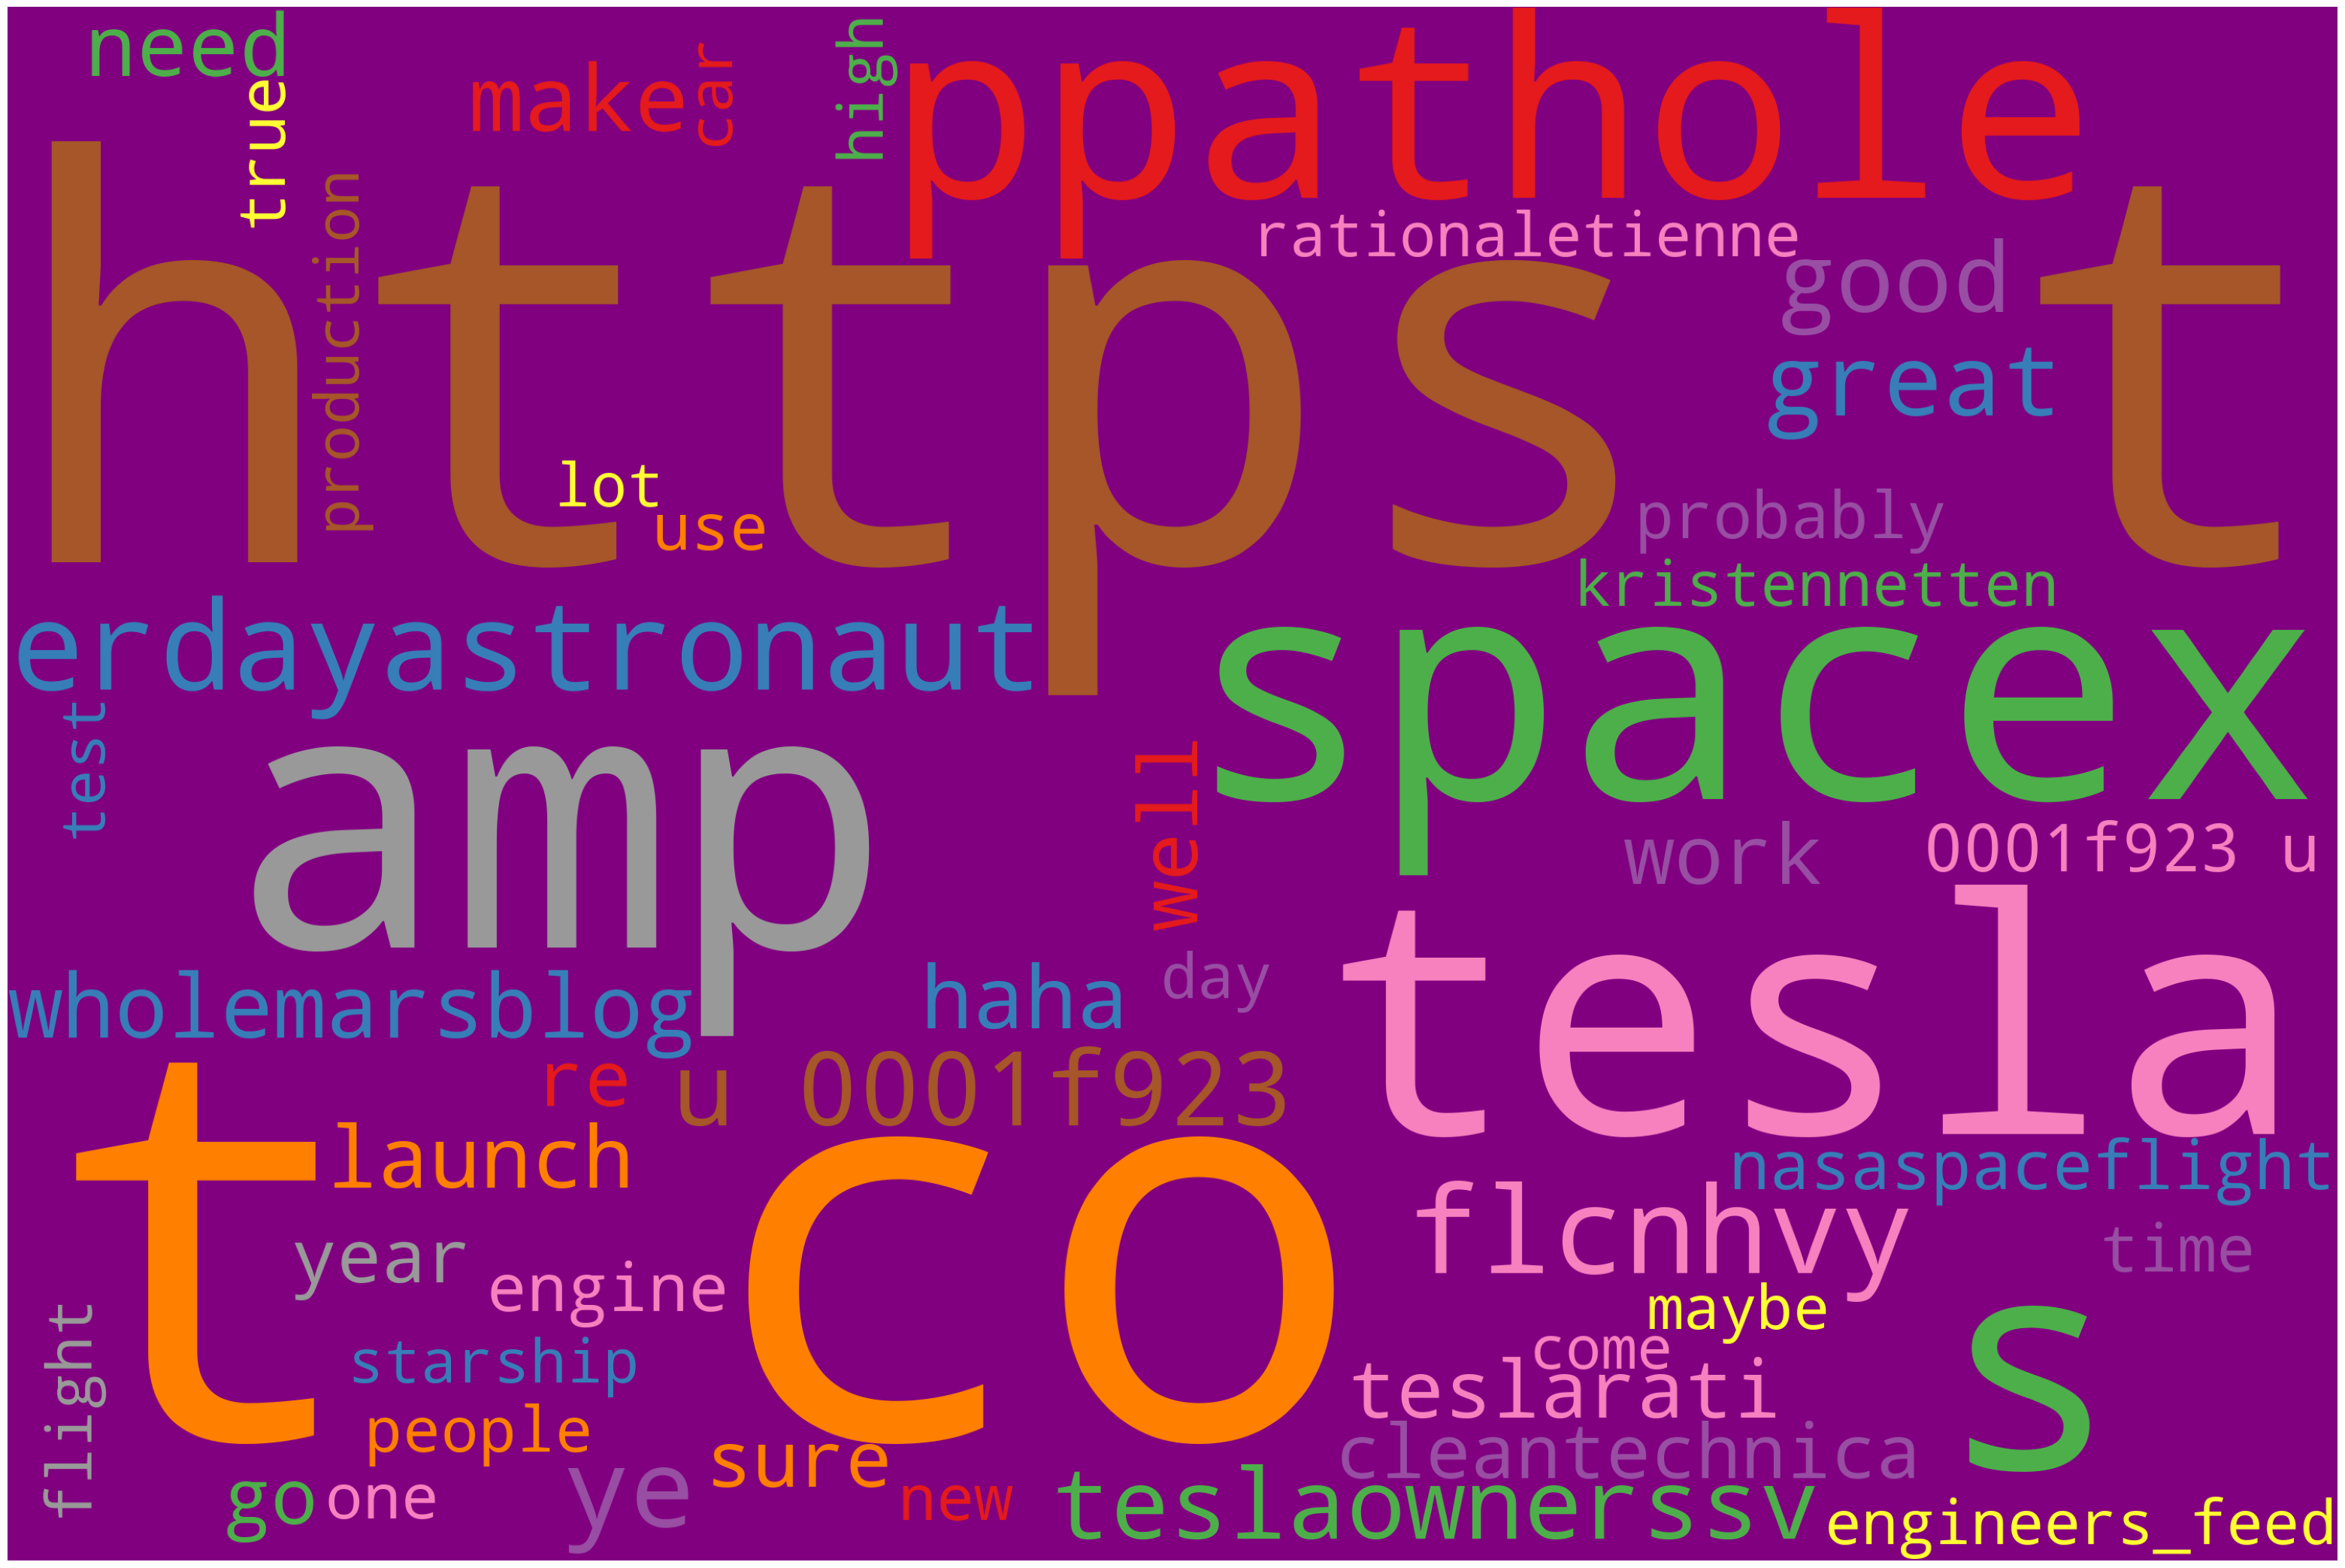

In [38]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='purple',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_df)
plot_cloud(wordcloud)